# Dragon Real Estate Price Predictor

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Reading CSV Files having Dataset

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Train-Test Splitting

In [6]:
def split_train_test(data, test_ratio):
    shuffle=np.random.permutation(len(data))
    np.random.seed(42)
    test_size=int(len(data)*test_ratio)
    train_indices=shuffle[test_size:]
    test_indices=shuffle[:test_size]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}")
print(f"Rows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
spl=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in spl.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [9]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [10]:
housing=strat_train_set.copy()

## Looking for Correlations

In [11]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679704
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CHAS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='CHAS'>,
        <AxesSubplot:xlabel='RM',

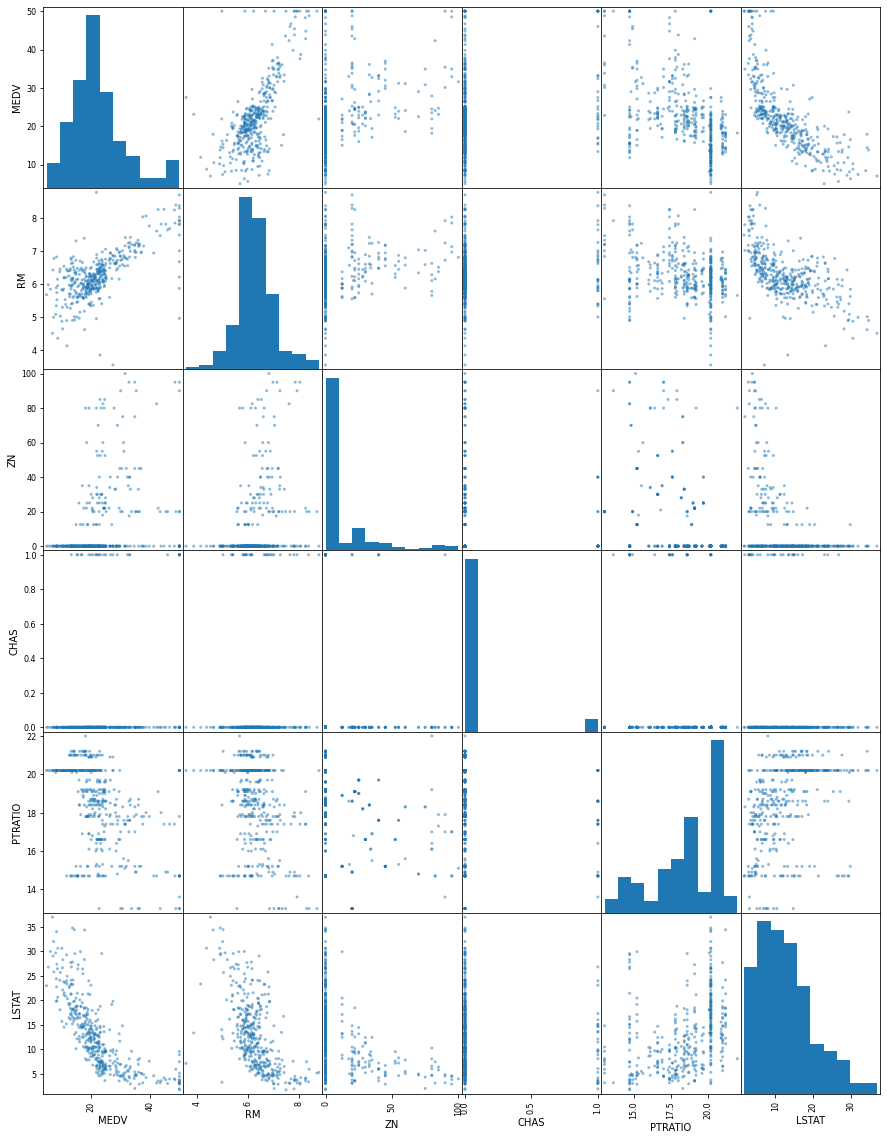

In [12]:
from pandas.plotting import scatter_matrix
attr=['MEDV','RM','ZN', 'CHAS', 'PTRATIO', 'LSTAT']
scatter_matrix(housing[attr], figsize=(15,20))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

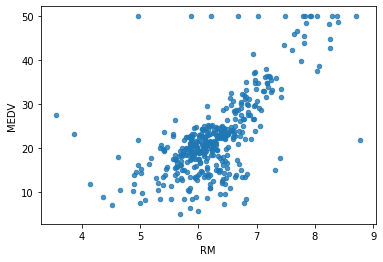

In [13]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

# Attribute Combinations

In [14]:
housing['TPM']=housing['TAX'] / housing['RM']

In [15]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,NaN,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,NaN
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [16]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679704
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TPM       -0.523081
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TPM', ylabel='MEDV'>

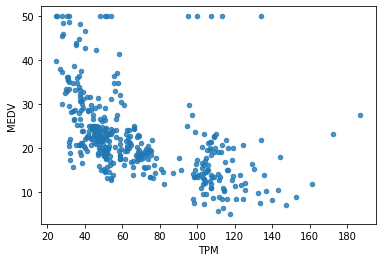

In [17]:
housing.plot(kind='scatter', x='TPM', y='MEDV', alpha=0.8)

In [18]:
housing=strat_train_set.drop('MEDV', axis=1)
housing_labels=strat_train_set['MEDV']

# Missing Attributes

In [19]:
# set the missing vales to 0, mean or median
len(housing['RM'])

404

In [20]:
median=housing["RM"].median()
median

6.209

In [21]:
housing["RM"].fillna(median)

254    6.108
348    6.209
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [22]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279990,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716469,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Creating a Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),   #SimpleImputer is the placeholder for missing values
    ('std_Scaler', StandardScaler())  #StandardScaler=(value-mean)/std
])

In [24]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

# Model Selections:

## Linear Regression (Model 1)

### Selecting the Model

In [25]:
from sklearn.linear_model import LinearRegression

model_1=LinearRegression()

#model_3=RandomForestRegressor()
model_1.fit(housing_num_tr, housing_labels)

LinearRegression()

### Evaluating the Model

In [26]:
from sklearn.metrics import mean_squared_error
housing_predictions_1=model_1.predict(housing_num_tr)
mse_1=mean_squared_error(housing_labels, housing_predictions_1)
rmse_1=np.sqrt(mse_1)
rmse_1

4.825044498172857

### Using Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
scores_1=cross_val_score(model_1, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores_1=np.sqrt(-scores_1)
rmse_scores_1

array([4.1918792 , 4.26437533, 5.11533629, 3.83119874, 5.3383304 ,
       4.37456289, 7.46776431, 5.47134222, 4.14155066, 6.04762663])

## Decision Tree Regressor (Model 2)

### Selecting the Model

In [28]:
from sklearn.tree import DecisionTreeRegressor
model_2=DecisionTreeRegressor()
model_2.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

### Evaluating the Model

In [29]:
housing_predictions_2=model_2.predict(housing_num_tr)
mse_2=mean_squared_error(housing_labels, housing_predictions_2)
rmse_2=np.sqrt(mse_2)
rmse_2

0.0

### Using Cross Validation

In [30]:
scores_2=cross_val_score(model_2, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores_2=np.sqrt(-scores_2)
rmse_scores_2

array([3.76560169, 4.79104856, 5.09887601, 3.75099987, 3.9548072 ,
       2.74517759, 6.77580254, 3.79535901, 3.1872794 , 3.93144376])

## Random Forest Regressor (Model 3)

### Selecting the Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
model_3=RandomForestRegressor()
model_3.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

### Evaluating the Model

In [32]:
housing_predictions_3=model_3.predict(housing_num_tr)
mse_3=mean_squared_error(housing_labels, housing_predictions_3)
rmse_3=np.sqrt(mse_3)
rmse_3

1.2265963431825926

### Using Cross Validation

In [33]:
scores_3=cross_val_score(model_3, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores_3=np.sqrt(-scores_3)
rmse_scores_3

array([2.76485773, 2.64814242, 4.54396779, 2.63709174, 3.60719401,
       2.85472456, 4.63052046, 3.29997361, 3.02159829, 3.21874415])

## Accuracy of Training Set using above 3 Models:

In [34]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [35]:
print_scores(rmse_scores_1)

scores: [4.1918792  4.26437533 5.11533629 3.83119874 5.3383304  4.37456289
 7.46776431 5.47134222 4.14155066 6.04762663]
mean: 5.0243966698349904
standard deviation: 1.0592341472453508


In [36]:
print_scores(rmse_scores_2)

scores: [3.76560169 4.79104856 5.09887601 3.75099987 3.9548072  2.74517759
 6.77580254 3.79535901 3.1872794  3.93144376]
mean: 4.179639562794171
standard deviation: 1.0777903449023702


In [37]:
print_scores(rmse_scores_3)

scores: [2.76485773 2.64814242 4.54396779 2.63709174 3.60719401 2.85472456
 4.63052046 3.29997361 3.02159829 3.21874415]
mean: 3.3226814757132757
standard deviation: 0.695707364346176


# Testing the Model

In [38]:
X_test=strat_test_set.drop("MEDV", axis=1)
y_test=strat_test_set["MEDV"]
X_test_prepared=my_pipeline.transform(X_test)

## Accuracy of Testing Set using above 3 Models:

### Linear Regression (Model 1)

In [39]:
final_prediction_1=model_1.predict(X_test_prepared)
final_mse_1=mean_squared_error(y_test, final_prediction_1)
final_rmse_1=np.sqrt(final_mse_1)
final_rmse_1

4.145988546958019

### Decision Tree Regressor (Model 2)

In [40]:
final_prediction_2=model_2.predict(X_test_prepared)
final_mse_2=mean_squared_error(y_test, final_prediction_2)
final_rmse_2=np.sqrt(final_mse_2)
final_rmse_2

4.166309788638137

### RandomForestRegressor (Model 3)

In [41]:
final_prediction_3=model_3.predict(X_test_prepared)
final_mse_3=mean_squared_error(y_test, final_prediction_3)
final_rmse_3=np.sqrt(final_mse_3)
final_rmse_3

2.9730459656260755

##### Since, the RandomForestRegressor (Model 3) has the lowest Root Mean Square Error, it predicts the test set with the highest accuracy among the 3 models.

# Saving the Model

In [42]:
from joblib import dump, load
dump(model_3, "Dragon.joblib")

['Dragon.joblib']

# Making the Prediction System

In [44]:
input_data=[float(s) for s in (input('Enter 13 features:')).split()]
input_data_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_numpy_array.reshape(1,-1)
prediction=model_3.predict(input_data_reshaped)
print(prediction)

Enter 13 features:1 1 1 1 1 1 1 1 1 1 1 1 1
[17.366]
